In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.linear_model import LogisticRegressionCV
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
houston_unemp = pd.read_csv('../project-4/Unemployment Claims.csv')

In [3]:
houston_unemp.head()

,State,Filed week ended,Initial Claims,Reflecting Week Ended,Continued Claims,Covered Employment,Insured Unemployment Rate
0,Texas,1/2/10,"16,583",12/26/09,"265,975","10,229,773",2.60
1,Texas,1/9/10,"32,475",1/2/10,"261,160","10,229,773",2.55
2,Texas,1/16/10,"24,421",1/9/10,"264,374","10,151,451",2.60
3,Texas,1/23/10,"19,985",1/16/10,"254,414","10,151,451",2.51
4,Texas,1/30/10,"21,108",1/23/10,"256,819","10,151,451",2.53


In [4]:
houston_unemp.index = pd.DatetimeIndex(houston_unemp['Reflecting Week Ended'].values)

In [5]:
houston_unemp['Initial Claims'] = houston_unemp['Initial Claims'].str.replace(',', '')
houston_unemp['Continued Claims'] = houston_unemp['Continued Claims'].str.replace(',', '')

In [6]:
houston_unemp['Initial Claims'] = houston_unemp['Initial Claims'].astype(int)
houston_unemp['Continued Claims'] = houston_unemp['Continued Claims'].astype(int)

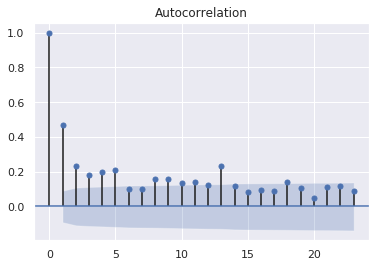

In [7]:
plot_acf(houston_unemp['Initial Claims'], lags = (len(houston_unemp) / 20));

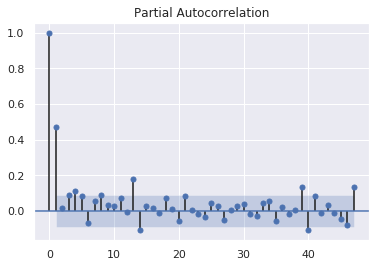

In [8]:
plot_pacf(houston_unemp['Initial Claims'], lags = (len(houston_unemp) / 10));

In [9]:
houston_unemp.index[-105]

Timestamp('2016-12-31 00:00:00')

In [10]:
houston_unemp.index[-104]

Timestamp('2017-01-07 00:00:00')

In [11]:
train_stop_row = houston_unemp.shape[0] - 105
test_start = train_stop_row
test_end = houston_unemp.shape[0]

In [12]:
train = houston_unemp.iloc[:train_stop_row]
test = houston_unemp.iloc[train_stop_row:]

In [13]:
print(train.shape)
print(test.shape)

(366, 7)
(105, 7)


In [14]:
sarima = SARIMAX(endog = train['Initial Claims'],
                 order = (1, 0, 1),              # (p, d, q)
                 seasonal_order = (1, 0, 1, 5),
                 enforce_stationarity = False,
                 enforce_invertibility = False)  # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start = test_start, end = test_end - 1)

# Evaluate predictions.
print(mean_absolute_error(test['Initial Claims'], preds))

/Users/ashleywhite/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


2759.0599013410015


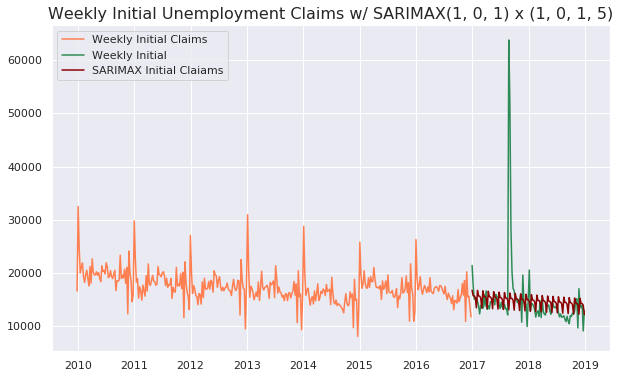

In [15]:
# Plot data.
plt.figure(figsize=(10,6))
plt.title(label = 'Weekly Initial Unemployment Claims w/ SARIMAX(1, 0, 1) x (1, 0, 1, 5)', fontsize=16);
sns.lineplot(data=train['Initial Claims'], color="coral", label="Weekly Initial Claims")
sns.lineplot(data=test['Initial Claims'], color="seagreen", label="Weekly Initial")
sns.lineplot(x = test.index, y = preds.values, color = 'darkred', label = 'SARIMAX Initial Claiams')

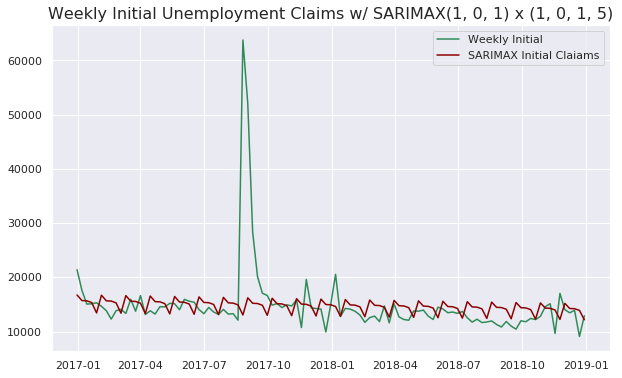

In [16]:
# Plot data.
plt.figure(figsize=(10,6))
plt.title(label = 'Weekly Initial Unemployment Claims w/ SARIMAX(1, 0, 1) x (1, 0, 1, 5)', fontsize=16);
#sns.lineplot(data=train['Initial Claims'], color="coral", label="Weekly Initial Claims")
sns.lineplot(data=test['Initial Claims'], color="seagreen", label="Weekly Initial")
sns.lineplot(x = test.index, y = preds.values, color = 'darkred', label = 'SARIMAX Initial Claiams')

In [17]:
preds = pd.DataFrame(preds, columns= ['Predicted Initial Claims'])

In [18]:
preds.head()

,Predicted Initial Claims
2016-12-31,16743.153356
2017-01-07,15711.630140
2017-01-14,15675.889550
2017-01-21,15347.489463
2017-01-28,13437.930157


In [19]:
houston_unemp_preds = houston_unemp.join(preds, on = houston_unemp.index)

In [20]:
houston_unemp_preds['dif - initial'] = houston_unemp_preds['Initial Claims'] - \
houston_unemp_preds['Predicted Initial Claims']

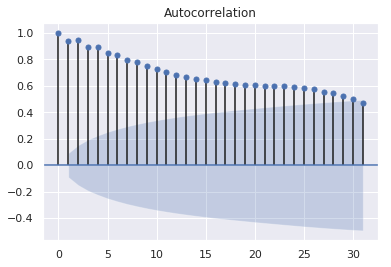

In [21]:
plot_acf(houston_unemp['Continued Claims'], lags = (len(houston_unemp) / 15));

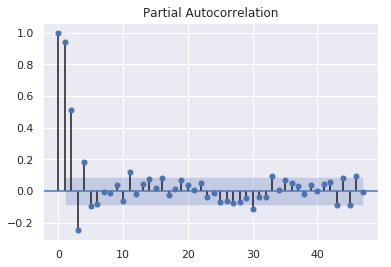

In [22]:
plot_pacf(houston_unemp['Continued Claims'], lags = (len(houston_unemp) / 10));

In [23]:
train_stop_row = houston_unemp.shape[0] - 105
test_start = train_stop_row
test_end = houston_unemp.shape[0]

In [24]:
train = houston_unemp.iloc[:train_stop_row]
test = houston_unemp.iloc[train_stop_row:]

In [25]:
print(train.shape)
print(test.shape)

(366, 7)
(105, 7)


In [26]:
sarima = SARIMAX(endog = train['Continued Claims'],
                 order = (1, 0, 1),              # (p, d, q)
                 seasonal_order = (1, 0, 1, 5),
                 enforce_stationarity = False,
                 enforce_invertibility = False)  # (P, D, Q, S)

# Fit SARIMA model.
model = sarima.fit()

# Generate predictions based on test set.
preds = model.predict(start = test_start, end = test_end - 1)

# Evaluate predictions.
print(mean_absolute_error(test['Continued Claims'], preds))

/Users/ashleywhite/anaconda3/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  % freq, ValueWarning)


10077.377925407984


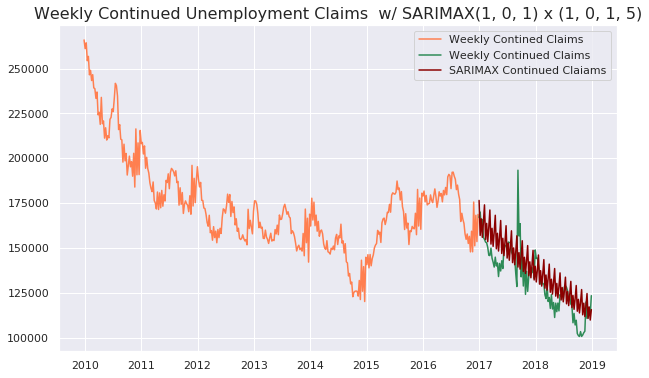

In [27]:
# Plot data.
plt.figure(figsize=(10,6))
plt.title(label = 'Weekly Continued Unemployment Claims  w/ SARIMAX(1, 0, 1) x (1, 0, 1, 5)', fontsize=16);
sns.lineplot(data=train['Continued Claims'], color="coral", label="Weekly Contined Claims")
sns.lineplot(data=test['Continued Claims'], color="seagreen", label="Weekly Continued Claims")
sns.lineplot(x = test.index, y = preds.values, color = 'darkred', label = 'SARIMAX Continued Claiams')

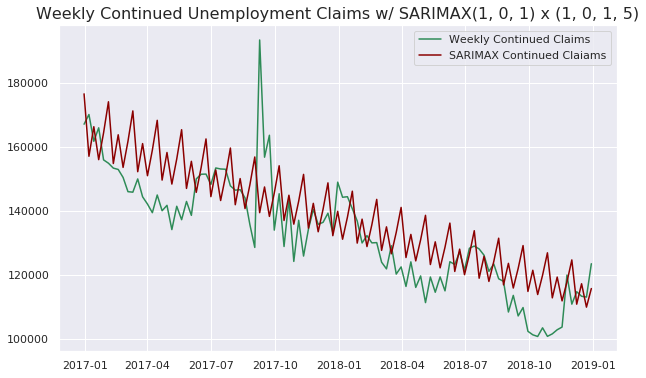

In [28]:
# Plot data.
plt.figure(figsize=(10,6))
plt.title(label = 'Weekly Continued Unemployment Claims w/ SARIMAX(1, 0, 1) x (1, 0, 1, 5)', fontsize=16);
#sns.lineplot(data=train['Continued Claims'], color="coral", label="Weekly Initial Claims")
sns.lineplot(data=test['Continued Claims'], color="seagreen", label="Weekly Continued Claims")
sns.lineplot(x = test.index, y = preds.values, color = 'darkred', label = 'SARIMAX Continued Claiams')

In [29]:
preds = pd.DataFrame(preds, columns= ['Predicted Continued Claims'])

In [30]:
preds.head()

,Predicted Continued Claims
2016-12-31,176507.153313
2017-01-07,156992.747513
2017-01-14,166237.349344
2017-01-21,155942.378274
2017-01-28,164314.331582


In [31]:
houston_unemp_preds = houston_unemp_preds.join(preds, on = houston_unemp_preds.index)

In [32]:
houston_unemp_preds['dif - continued'] = houston_unemp_preds['Continued Claims'] - \
houston_unemp_preds['Predicted Continued Claims']

In [33]:
houston_unemp_preds.to_csv('../project-4/houston_unemployment_preds.csv')